In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load processed data
data_path = "/Users/adityasrivatsav/Documents/GitHub/End-to-End-Project-on-Medical--Health-Care-Assisstant-with.-Chatbot-/data/Final_Hospital_LoS_RNN.csv"
df = pd.read_csv(data_path)

In [5]:
df.head()

,patient_id,reason_for_admission,age,sex,height,weight,comorbidities,comorbidities_other,received_covid_vaccine,medications,...,anticoagulation,steroid,did_the_patient_expire_in_hospital,days_in_hospital_prior_to_expiration,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,severity_score
0,1,Fever [R50.9],0.679012,0,0.583562,0.285049,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",212,NaN,"""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",...,Yes,No,1.0,20.0,0.25,0.107692,NaN,0.0,NaN,0.145833
1,1,Fever [R50.9],0.679012,0,0.583562,0.285049,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",212,NaN,"""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",...,Yes,Yes,1.0,20.0,0.25,0.107692,NaN,0.0,NaN,0.145833
2,1,Fever [R50.9],0.679012,0,0.583562,0.285049,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",212,NaN,"""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",...,Yes,Yes,1.0,20.0,0.25,0.107692,NaN,0.0,NaN,0.145833
3,1,Fever [R50.9],0.679012,0,0.583562,0.285049,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",212,NaN,"""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",...,Yes,Yes,1.0,20.0,0.25,0.107692,NaN,0.0,NaN,0.145833
4,1,Fever [R50.9],0.679012,0,0.583562,0.285049,"""[\""Hypertension\"",\""Diabetes\"",\""Other\""]""",212,NaN,"""[{\""medications\"":\""TYLENOL EXTRA STRENGTH\"",...",...,Yes,Yes,1.0,20.0,0.25,0.107692,NaN,0.0,NaN,0.145833


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


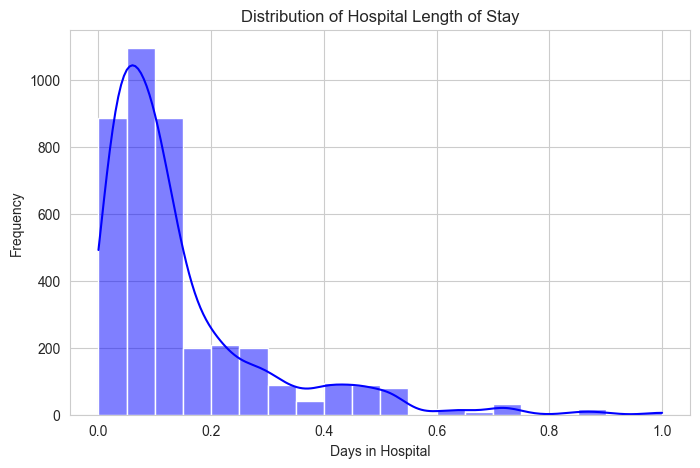

In [7]:
# Set visualization style
sns.set_style("whitegrid")

# Visualization 1: Distribution of Hospital Length of Stay (Target Variable)
plt.figure(figsize=(8, 5))
sns.histplot(df['hospital_length_of_stay'], bins=20, kde=True, color="blue")
plt.title("Distribution of Hospital Length of Stay")
plt.xlabel("Days in Hospital")
plt.ylabel("Frequency")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


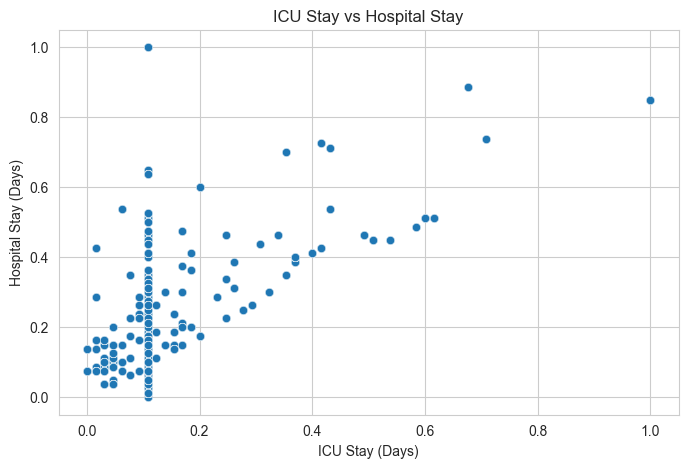

In [8]:
# Visualization 2: ICU Length of Stay vs Hospital Length of Stay
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['icu_length_of_stay'], y=df['hospital_length_of_stay'], alpha=0.6)
plt.title("ICU Stay vs Hospital Stay")
plt.xlabel("ICU Stay (Days)")
plt.ylabel("Hospital Stay (Days)")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


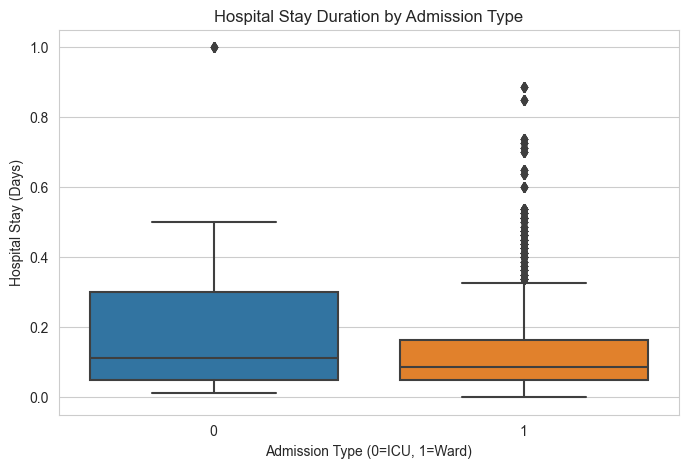

In [ ]:
# Boxplot of Hospital Stay by Admission Disposition (ICU vs Ward)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['admission_disposition'], y=df['hospital_length_of_stay'])
plt.title("Hospital Stay Duration by Admission Type")
plt.xlabel("Admission Type (0=ICU, 1=Ward)")
plt.ylabel("Hospital Stay (Days)")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


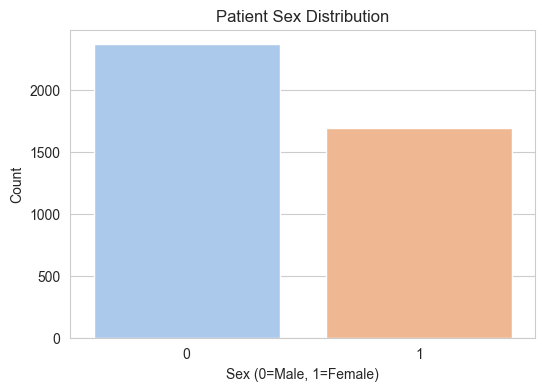

In [ ]:
# Countplot of Patient Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sex'], palette="pastel")
plt.title("Patient Sex Distribution")
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Count")
plt.show()